<a href="https://colab.research.google.com/github/Manoj-Kumar-Paliviri/Fruits-Image-Classification/blob/main/ML_Mini_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMAGE CLASSIFICATION THROUGH MACHINE LEARNING**

In [1]:
#Preprocessing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []                 #list for output(1-D) data(dependent variable)
images = []                 #list for input(2-D) data
flat_data = []              #list for flattened input data(1-D)(independent variable)

DATADIR = '/content/drive/MyDrive/VERZEO/PYTHON-APRIL/Machine Learning/Data Sets/Fruits'
CATEGORIES = ['ORANGE','BANANA','APPLE']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i)               #label encoding
  path = os.path.join(DATADIR,i)                #creating a path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  #normalizing each and every image iteratively to a number between 0 and 1
    flat_data.append(img_resized.flatten())     #flattening the data and storing in the list
    images.append(img_resized)
    target.append(class_num)
    #plt.imshow(img_resized)
    #plt.show()                                 #Use just in case to show the resized images
flat_data = np.array(flat_data)
images = np.array(images)                         #transforming all the data into a 1-D array
target = np.array(target)

In [2]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [3]:
unique,count = np.unique(target,return_counts=True)

<BarContainer object of 3 artists>

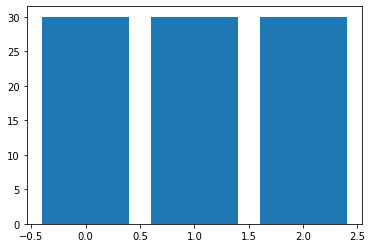

In [4]:
plt.bar(unique,count)

In [5]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.25,random_state=0)

In [6]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2])

In [7]:
y_test

array([0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2])

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = {'C':[0.1,1,10,100],
               'kernel':['linear','rbf']}              
grid  = GridSearchCV(SVC(probability=True),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']})

In [9]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2])

In [10]:
y_test

array([0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       2])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
accuracy_score(y_pred,y_test)

0.9130434782608695

In [13]:
confusion_matrix(y_pred,y_test)

array([[8, 0, 1],
       [0, 8, 0],
       [1, 0, 5]])

In [14]:
#saving the model using pickle
import joblib
joblib.dump(model,'Fruit Classifier')

['Fruit Classifier']

In [15]:
model = joblib.load('Fruit Classifier')

Enter the url of image:https://media.istockphoto.com/photos/orange-picture-id185284489?k=6&m=185284489&s=612x612&w=0&h=x_w4oMnanMTQ5KtSNjSNDdiVaSrlxM4om-3PQTIzFaY=
(563, 612, 3)
Predicted output:ORANGE


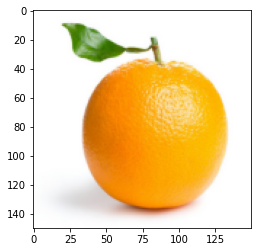

In [16]:
#Testing random image
flat_data = []
url = input('Enter the url of image:')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')
#sample image link - https://media.istockphoto.com/photos/orange-picture-id185284489?k=6&m=185284489&s=612x612&w=0&h=x_w4oMnanMTQ5KtSNjSNDdiVaSrlxM4om-3PQTIzFaY=

# **DEPLOYMENT USING STREAMLIT**



In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok 

     |████████████████████████████████| 9.7 MB 4.5 MB/s 
     |████████████████████████████████| 164 kB 50.4 MB/s 
     |████████████████████████████████| 180 kB 38.0 MB/s 
     |████████████████████████████████| 111 kB 39.5 MB/s 
     |████████████████████████████████| 4.3 MB 33.4 MB/s 
     |████████████████████████████████| 76 kB 1.2 MB/s 
     |████████████████████████████████| 63 kB 787 kB/s 
     |████████████████████████████████| 128 kB 66.0 MB/s 
     |████████████████████████████████| 792 kB 64.9 MB/s 
     |████████████████████████████████| 380 kB 70.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.27 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.0 which is incompatible.
google-colab 1.0.0 requires ipytho

In [ ]:
%%writefile ML_Mini_Project.py 
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import joblib
from PIL import Image
st.title('Image Classfier using Machine Learning')
st.text('Upload the image to classify')
model = joblib.load('Fruit Classifier')
uploaded_file = st.file_uploader("Choose an Image....",type = 'jpg')

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = 'Uploaded image')

if st.button('PREDICT'):
  st.write('Result....')
  CATEGORIES = ['ORANGE','BANANA','APPLE']
  flat_data = []
  img = np.array(img)
  img_resized = resize(img,(150,150,3)) 
  flat_data.append(img_resized.flatten())
  flat_data = np.array(flat_data)
  y_out = model.predict(flat_data)
  y_out = CATEGORIES[y_out[0]]
  st.title(f'Predicted output:{y_out}')
  q = model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):                  #prints the probability of all the categories
    st.write(f'{item} : {q[0][index]*100}%')

Writing ML_Mini_Project.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://6de4-34-80-203-126.ngrok.io'